In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [88]:
#importing the data tables

df = pd.read_csv("Customer_Final_Purchasing_Dataset.csv")
products = pd.read_csv("Products_Description.csv")

In [73]:
#Checking transaction dataset
df.head()

,TransactionID,Transaction,CustomerID,Mobile_number,Customer Name,Age,Billing Without GST,Billing With GST,Date,Zip Code
0,TI0001,"['Camera', 'Camera-holder', 'SD-card']",CUST023,7023711077,Safyr,28.0,53750,60200,1/1/2017,54935
1,TI0002,"['Camera', 'Focus-lens', 'Camera-holder', 'SD-...",CUST012,7023711088,Ballinamore,24.0,68750,77000,1/1/2017,54169
2,TI0003,"['Auto-focus-mount-adapter', 'Camera', 'Photog...",CUST034,7023711066,Sahib,59.0,70050,78456,1/1/2017,54964
3,TI0004,"['Camera', 'Focus-lens', 'Camera-holder', 'SD-...",CUST008,7023711092,Ballad,22.0,68750,77000,1/1/2017,54061
4,TI0005,"['Camera', 'Photographic-lighting', 'Camera-ho...",CUST029,7023711071,Sagiv,30.0,56100,62832,1/1/2017,54952


In [74]:
#Checking Product dataset
products

,Product Name,Costing Price,Selling Price,Profit
0,Mobile-phone,40500.0,45000,4500.0
1,Screen-Protector,90.0,300,210.0
2,Sim,120.0,150,30.0
3,Cover-Case,440.0,1100,660.0
4,Earphones,2000.0,2500,500.0
5,Power-Bank,1250.0,2500,1250.0
6,Camera,35000.0,50000,15000.0
7,Focus-lens,9600.0,15000,5400.0
8,SD-card,1187.5,1250,62.5
9,Camera-holder,1875.0,2500,625.0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 10 columns):
TransactionID          440 non-null object
Transaction            440 non-null object
CustomerID             440 non-null object
Mobile_number          440 non-null int64
Customer Name          437 non-null object
Age                    426 non-null float64
Billing Without GST    440 non-null int64
Billing With GST       440 non-null int64
Date                   440 non-null object
Zip Code               440 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 34.5+ KB


In [76]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
Product Name     13 non-null object
Costing Price    13 non-null float64
Selling Price    13 non-null int64
Profit           13 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 544.0+ bytes


In [77]:
#Describing transaction data
df.describe()

,Mobile_number,Age,Billing Without GST,Billing With GST,Zip Code
count,4.400000e+02,426.000000,440.000000,440.000000,440.000000
mean,7.023711e+09,33.814554,36547.272727,40932.945455,54480.797727
std,1.159559e+01,13.840805,24842.923245,27824.074035,939.575326
min,7.023711e+09,15.000000,150.000000,168.000000,50201.000000
25%,7.023711e+09,25.000000,4050.000000,4536.000000,54136.000000
50%,7.023711e+09,27.000000,46100.000000,51632.000000,54927.000000
75%,7.023711e+09,52.000000,53750.000000,60200.000000,54957.000000
max,7.023711e+09,59.000000,83450.000000,93464.000000,55404.000000


### Handling Missing value...

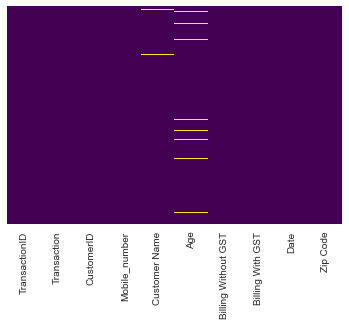

In [78]:
#Visuallizing missing value using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### As we can see there are some data missing in Age and name column

In [80]:
# Filling age missing data with average of ages
mean_age = np.mean(df['Age'])
mean_age = round(mean_age)
df["Age"].fillna(mean_age, inplace = True)

In [81]:
# Filling name missing data with default name
df["Customer Name"].fillna("No-Name", inplace = True)

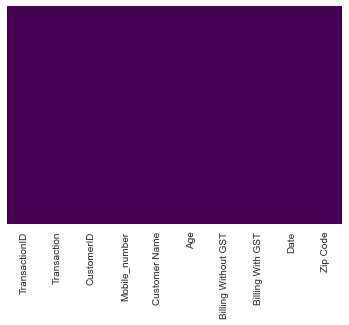

In [82]:
#Visuallizing missing value using heatmap Now there is no missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Data Analysis on Product 

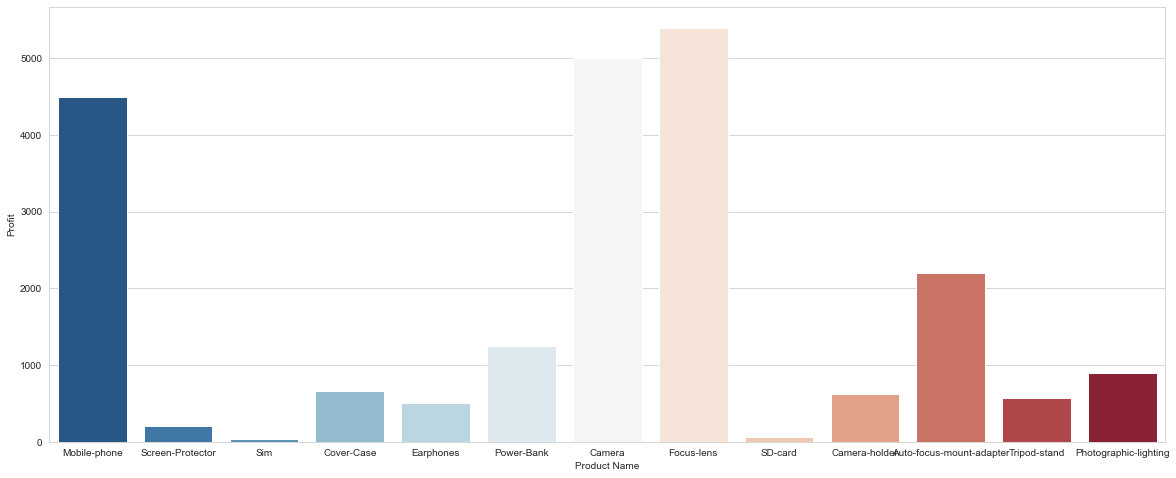

In [89]:
# Unit Profit margin comparision of different products....
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style('whitegrid')
sns.barplot(y='Profit',x='Product Name',data=products,palette='RdBu_r',ax=ax)

In [90]:
# Indivisual quantity of products purchased
dic = {}
for t in df["Transaction"]:
    lst = t.split("'")
    for x in lst:
        if x in dic:
            dic[x] = dic[x]+1
        else:
            dic[x] = 1

In [91]:
dic.pop(', ')
dic.pop('[')
dic.pop(']')

440

In [92]:
# dic contain keys as products and values as quantity of product sold
dic

{'Camera': 159,
 'Camera-holder': 133,
 'SD-card': 210,
 'Focus-lens': 82,
 'Auto-focus-mount-adapter': 41,
 'Photographic-lighting': 29,
 'Tripod-stand': 34,
 'Cover-Case': 48,
 'Screen-Protector': 83,
 'Sim': 110,
 'Mobile-phone': 117,
 'Earphones': 57,
 'Power-Bank': 15}

Text(0, 0.5, 'Total Sales')

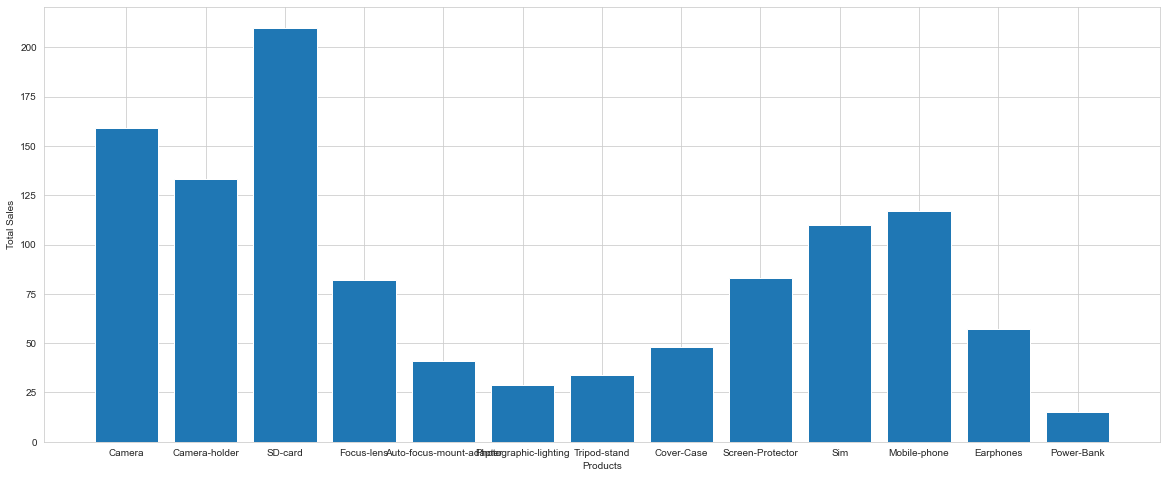

In [93]:
# Bar graph showing indivisual product sales
pro = dic.keys()
freq = dic.values()
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style('whitegrid')
plt.bar(pro, freq)
ax.set_xlabel('Products')
ax.set_ylabel('Total Sales')

In [94]:
# dictionary with product and thier unit price 
dic_product_unitPrice = {}
i = 0
for k in products['Product Name']:
        dic_product_unitPrice[k] = products['Profit'][i]
        i = i+1

In [95]:
# Total profit generated from different products....
dic_total_sale = {}
for k in dic_product_unitPrice:
    dic_total_sale[k] = dic[k]*dic_product_unitPrice[k]
dic_total_sale

{'Mobile-phone': 526500.0,
 'Screen-Protector': 17430.0,
 'Sim': 3300.0,
 'Cover-Case': 31680.0,
 'Earphones': 28500.0,
 'Power-Bank': 18750.0,
 'Camera': 795000.0,
 'Focus-lens': 442800.0,
 'SD-card': 13125.0,
 'Camera-holder': 83125.0,
 'Auto-focus-mount-adapter': 90405.0,
 'Tripod-stand': 19635.0,
 'Photographic-lighting': 26100.0}

Text(0, 0.5, 'Total Sales')

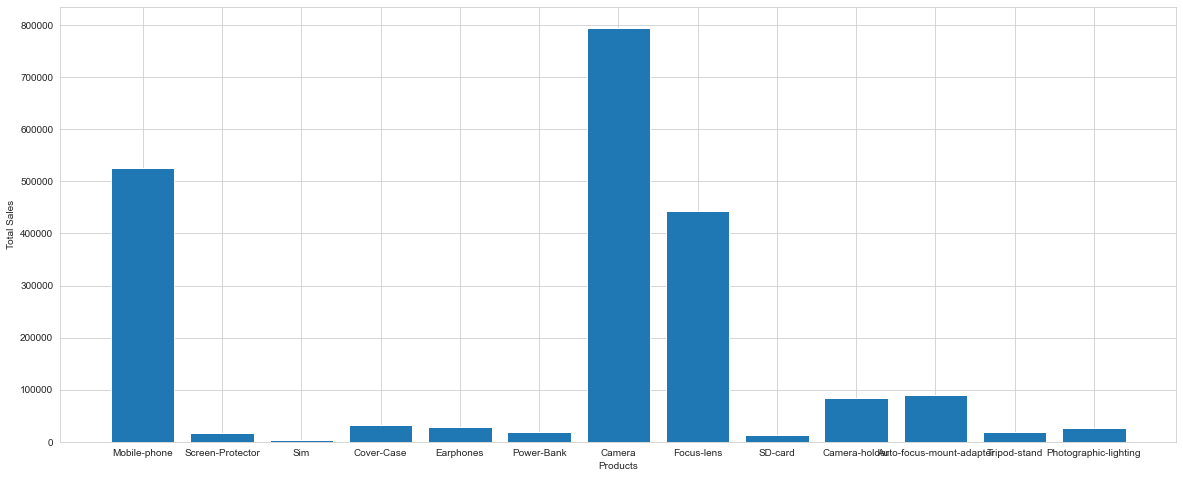

In [96]:
# Comparision of Total profit generated among different products....
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style('whitegrid')
plt.bar(dic_total_sale.keys(), dic_total_sale.values())
ax.set_xlabel('Products')
ax.set_ylabel('Total Sales')

In [97]:
temp = min(dic_total_sale.values()) 
min_profit_product = [key for key in dic_total_sale if dic_total_sale[key] == temp] 
temp = max(dic_total_sale.values()) 
max_profit_product = [key for key in dic_total_sale if dic_total_sale[key] == temp] 
print(min_profit_product,max_profit_product)

['Sim'] ['Camera']


### As clearly see and by calculation Camera contributed to highest profit and sim contributed to lowest profit 

### Data Analysis for understanding customers

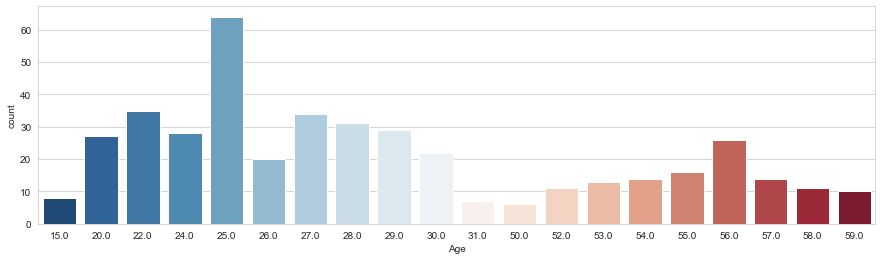

In [98]:
# Which age group is more active in buying
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style('whitegrid')
sns.countplot(x='Age',data=df,palette='RdBu_r',ax = ax)

#### We need to more focus on y

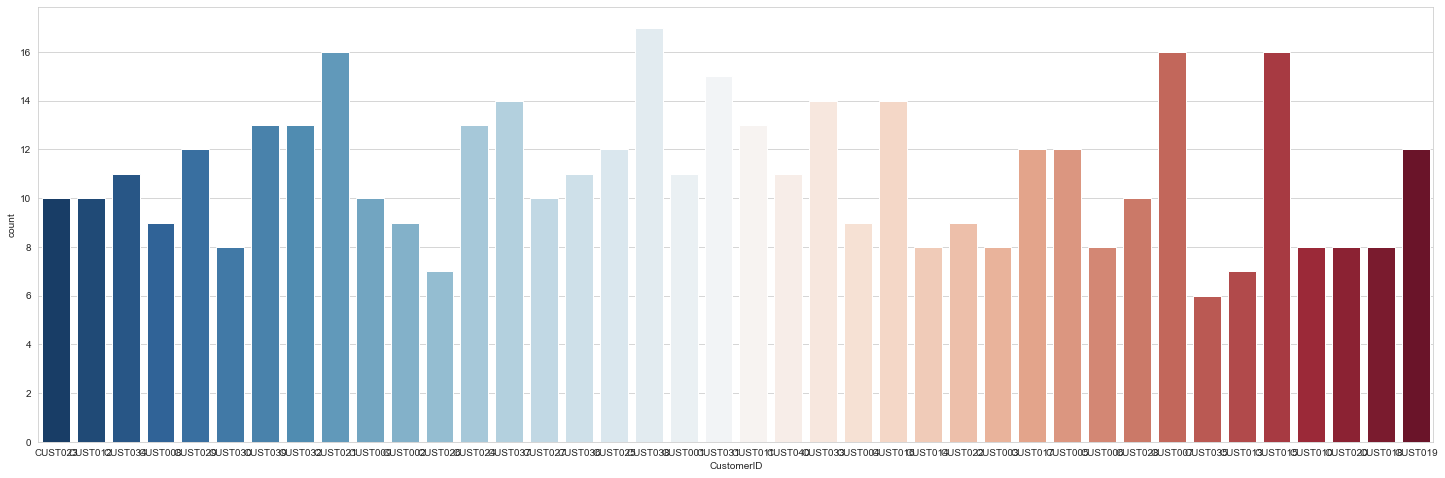

In [99]:
# Frequency of Purchase amoung different customers
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style('whitegrid')
sns.countplot(x='CustomerID',data=df,palette='RdBu_r',ax=ax)

In [100]:
#Top 10 buying customer
df["CustomerID"].value_counts()[:10]

CUST038    17
CUST015    16
CUST021    16
CUST007    16
CUST031    15
CUST033    14
CUST016    14
CUST037    14
CUST011    13
CUST024    13
Name: CustomerID, dtype: int64

In [59]:
# Hence these constumers are more into focus for marketing.